# **Linear Regression**

**Linear Regression** is a statistical method used to model the relationship between a dependent variable (target) and one or more independent variables (features). It assumes that this relationship can be described by a straight line (in the case of one independent variable) or a hyperplane (in the case of multiple independent variables). The goal of linear regression is to predict the dependent variable by fitting the best line or plane to the given data points.

Linear Regression is one of the simplest and most widely used algorithms in machine learning. Its strengths lie in its interpretability and efficiency, making it a go-to choice for many regression tasks. However, it’s important to ensure that the relationship between variables is linear, as the model can fail in more complex scenarios.

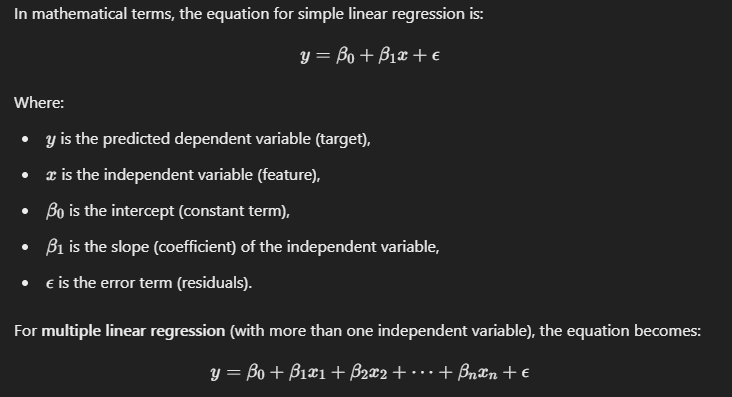

### When to Use Linear Regression?

Linear Regression is commonly used when:

- You want to model and understand the linear relationship between one or more independent variables and a dependent variable.

- You are looking for a simple and interpretable model for regression tasks.

- The relationship between the variables is approximately linear (i.e., the change in the target is proportional to the change in the feature).

- You need a baseline model for regression tasks to compare with more complex algorithms.

### How Does Linear Regression Work?

Linear Regression works by fitting a line (or hyperplane in the case of multiple variables) to minimize the difference between the predicted values and the actual target values. This difference is captured by the residual sum of squares (RSS):

### Who Should Use Linear Regression?

- **Data scientists, statisticians, and analysts**: Who want to model and quantify relationships between variables.

- **Business analysts**: To predict trends like sales forecasting, market demand, etc.

- **Researchers**: In social sciences or economics, where interpretability is important and linear models are commonly used.

### Advantages of Linear Regression:

- **Simplicity**: Easy to understand, implement, and interpret.

- **Efficiency**: Computationally fast, making it suitable for large datasets.

- **Interpretability**: The coefficients provide insights into how much each independent variable affects the dependent variable.

- **Baselines for comparison**: Often used as a baseline to compare with more complex models.

### Disadvantages of Linear Regression:

- **Linearity assumption**: It assumes a linear relationship between the independent and dependent variables, which may not always hold true.

- **Sensitivity to outliers**: Linear regression can be easily influenced by outliers in the data.

- **Multicollinearity**: When independent variables are highly correlated, it can cause issues with coefficient estimation and model interpretation.

- **Underfitting**: Linear regression might not capture complex patterns in the data, leading to underfitting.

### Real-World Applications of Linear Regression:

- **Predicting house prices**: Based on factors like square footage, number of rooms, and location.

- **Sales forecasting**: Using historical sales data and other relevant features to predict future sales.

- **Stock market prediction**: To estimate stock prices based on various financial indicators.

- **Healthcare**: Estimating patient outcomes like the length of hospital stay based on medical data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

np.random.seed(42)

In [2]:
num_samples = 500
years_of_experience = np.random.randint(2,21, size=num_samples)
slope = (200_000 - 60_000) / 18
intercept = 60_000

salaries = slope * years_of_experience + intercept + np.random.normal(0, 10_000, size=num_samples)

data = {'Years_of_Experience': years_of_experience, 'Salary': salaries}
df = pd.DataFrame(data)

df

,Years_of_Experience,Salary
0,8,115037.780010
1,16,182309.972927
2,12,156442.408989
3,9,144753.562169
4,8,130798.818454
...,...,...
495,18,203824.097462
496,8,123886.744304
497,14,173813.401529
498,5,101780.575328


In [3]:
df.describe()

,Years_of_Experience,Salary
count,500.000000,500.000000
mean,10.616000,142570.011096
std,5.662922,44935.263058
min,2.000000,54881.134555
25%,5.750000,104426.300731
50%,10.000000,139865.032545
75%,16.000000,182341.125962
max,20.000000,241879.376204


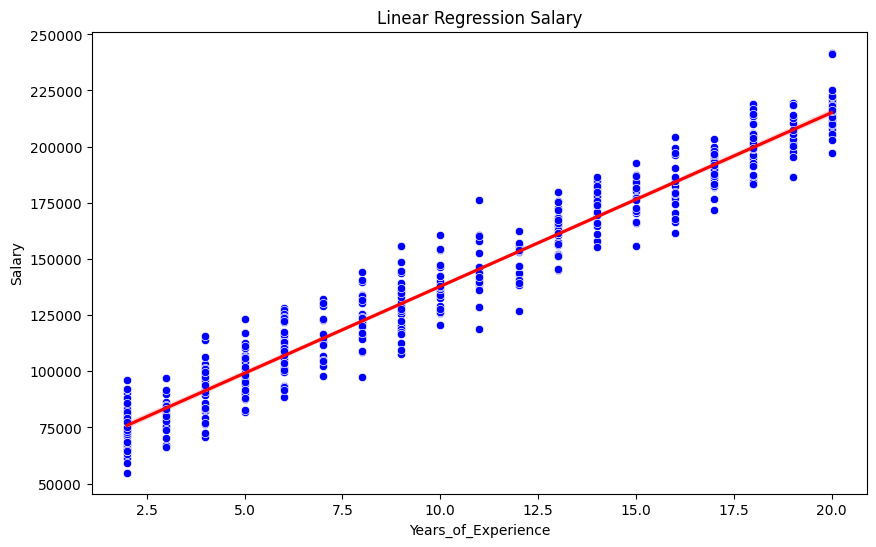

In [4]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="Years_of_Experience", y='Salary', data=df, color="blue")
sns.regplot(x="Years_of_Experience", y='Salary', data=df, scatter=False, color='red')

plt.xlabel("Years_of_Experience")
plt.ylabel('Salary')
plt.title('Linear Regression Salary')
plt.show()

In [5]:
X = df[['Years_of_Experience']]
y = df[['Salary']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [6]:
lr.score(X_train, y_train)

0.9488372177019488

In [7]:
lr.score(X_test, y_test)

0.9573704756930143

In [8]:
y_pred = lr.predict(X_test)
y_pred

array([[107141.01841859],
       [122534.2442647 ],
       [107141.01841859],
       [161017.30887996],
       [184107.14764911],
       [107141.01841859],
       [145624.08303385],
       [153320.69595691],
       [168713.92180301],
       [161017.30887996],
       [130230.85718775],
       [ 76354.56672638],
       [ 84051.17964944],
       [ 76354.56672638],
       [ 76354.56672638],
       [207196.98641827],
       [199500.37349522],
       [122534.2442647 ],
       [199500.37349522],
       [207196.98641827],
       [214893.59934132],
       [130230.85718775],
       [ 91747.79257249],
       [161017.30887996],
       [161017.30887996],
       [191803.76057217],
       [168713.92180301],
       [161017.30887996],
       [ 76354.56672638],
       [191803.76057217],
       [145624.08303385],
       [207196.98641827],
       [199500.37349522],
       [ 99444.40549554],
       [153320.69595691],
       [130230.85718775],
       [ 91747.79257249],
       [184107.14764911],
       [ 763

In [9]:
mean_absolute_error(y_test, y_pred)

7905.114728709234

In [10]:
root_mean_squared_error(y_test, y_pred)

9691.918147584149

In [11]:
r2_score(y_test, y_pred)

0.9573704756930143

In [12]:
lr.coef_

array([[7696.61292305]])

In [13]:
lr.intercept_

array([60961.34088028])

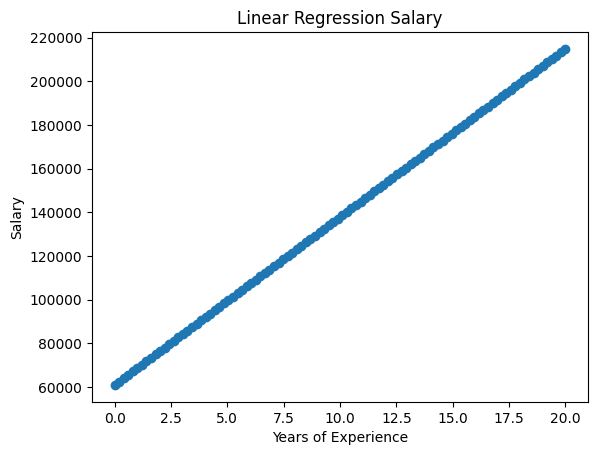

In [14]:
coefficients = lr.coef_
intercept = lr.intercept_
x = np.linspace(0, 20, 100)
y = coefficients*x + intercept

plt.scatter(x,y,label=f'y - {coefficients[0]} x + {intercept}')

plt.xlabel('Years of Experience')
plt.ylabel("Salary")
plt.title("Linear Regression Salary")

plt.show()